## Jonatan Alcala

In [1]:
import sys
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Class Purpose 

This class implementsa **basic Perceptron algorithm** for **binary classification**.
- Learns weights & bias from training data.
- Predicts class labels (0 or 1) using the **unit step function**.
- Updates weights when predictions are wrong. 

## Parameters (inputs when creating the object)
- `eta` (float): Learning rate (0–1). Controls how big each weight update is.
- `n_iter` (int): Number of passes (epochs) through the training dataset.
- `random_state` (int): Seed for reproducible random weight initialization. 

## Attributes (values stored after training)
- `w_` (1D array): The learned weights for each feature.
- `b_` (scalar): The learned bias (shifts the decision boundary).
- `errors_ ` (list): Records number of misclassifications (errors) at each epoch → useful to see convergence.

----

## Methods 

1. `__init__(...)`

    Initializes the perceptron with the chosen learning rate, number of iterations, and random state.

    ```python
    clf = Perceptron(eta=0.01, n_iter=50, random_state=1)
    ```
2. `fit(X, y)`

    Trains the perceptron.

    Steps:
    1. Initialize weights randomly (small values around 0).
    2. Initilize bias to 0. 
    3. For each epoch (repeat `n_iter` times):
        - Loop over each training example `(xi, target)`.
        - Compute the prediction.
        - Calcuate the update:

        Δw = η(target − prediction)xi  
        Δb = η(target − prediction)
        - Apply updates if the prediction was wrong.
        - Track number of errors. 

    At the end, `w_` and `b_` are tuned so the model can classfiy future data. 
3. `net_input(X)`
    
    Computes the **linear combination** of inputs and weights plus bias:
        z = wᵀX + b  
        Where:  
        - **X**: Input features (e.g., sepal length and petal length from the Iris dataset)
        - **w**: Weights learned during training  
        - **b**: Bias term  
        
        This computes the raw score before applying the unit step function for classification.
4. `predict(X)`

    Applies the **unit step function**:
    - If `net_input(X) >= 0` → class = 1
    - Else → class = 0

----

## Example Workflow
```python
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)
```
- Trains on `X_train, y_train`
- Makes predictions on new data

----

## Key Idea
- Updates **only happen when the model is wrong.**
- The bias term allows the decision boundary to shift (instead of always going through the origin).
- If the data is linearly separable, the algorithm **converges** (eventually no errors).

In [ ]:
class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]) # initialize weights from a normal distribution (decision is arbitrary)
        # Use this instead of zero because the learning rate (eta) would have no affect on the weights if they are all initialized to zero
        # we are just interested in small random values to avoid the properties of all-zero vectors

        # if you use libarry versions stated by book use float_, else if new use float64
        # self.b_ = np.float_(0.)
        self.b_ = np.float64(0.)
        
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)


In [28]:
# ## Training a perceptron model on the Iris dataset
# ### Reading-in the Iris data

file_path = 'iris.data'

try:
    df = pd.read_csv(file_path, header=None, encoding='utf-8')
    print(f"Successfully loaded '{file_path}'. First 5 rows:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except pd.errors.EmptyDataError:
    print(f"Error: The file '{file_path}' is empty or contains no data.")
except pd.errors.ParserError as e:
    print(f"Error: A parsing error occurred while reading '{file_path}': {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Successfully loaded 'iris.data'. First 5 rows:
     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


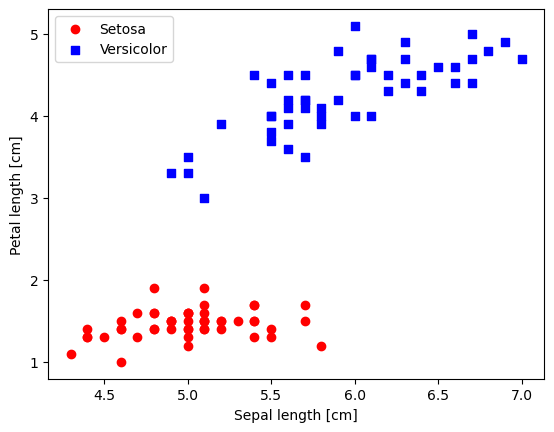

In [29]:
# ### Plotting the Iris data
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='s', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

In [30]:
# ### Training the perceptron model
ppn = Perceptron(eta=0.1, n_iter=10, random_state=1)
ppn.fit(X, y)

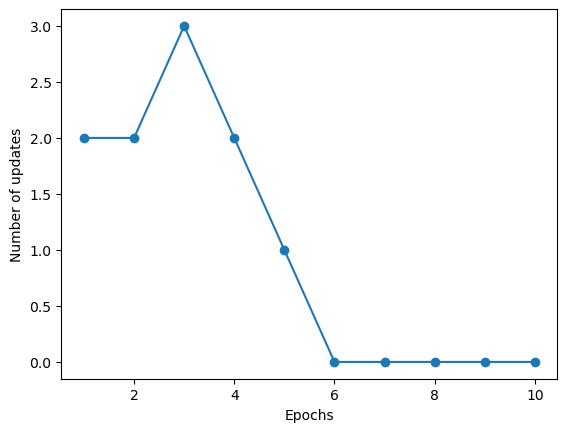

In [40]:
# Plot miscalssificaiotn error for each epoch
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

In [32]:
# ### A function for plotting decision regions
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

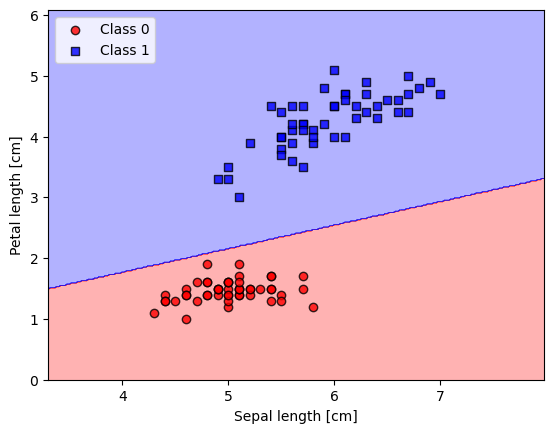

In [33]:
# Use binary deicsion space plotting function on example
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')


#plt.savefig('images/02_08.png', dpi=300)
plt.show()

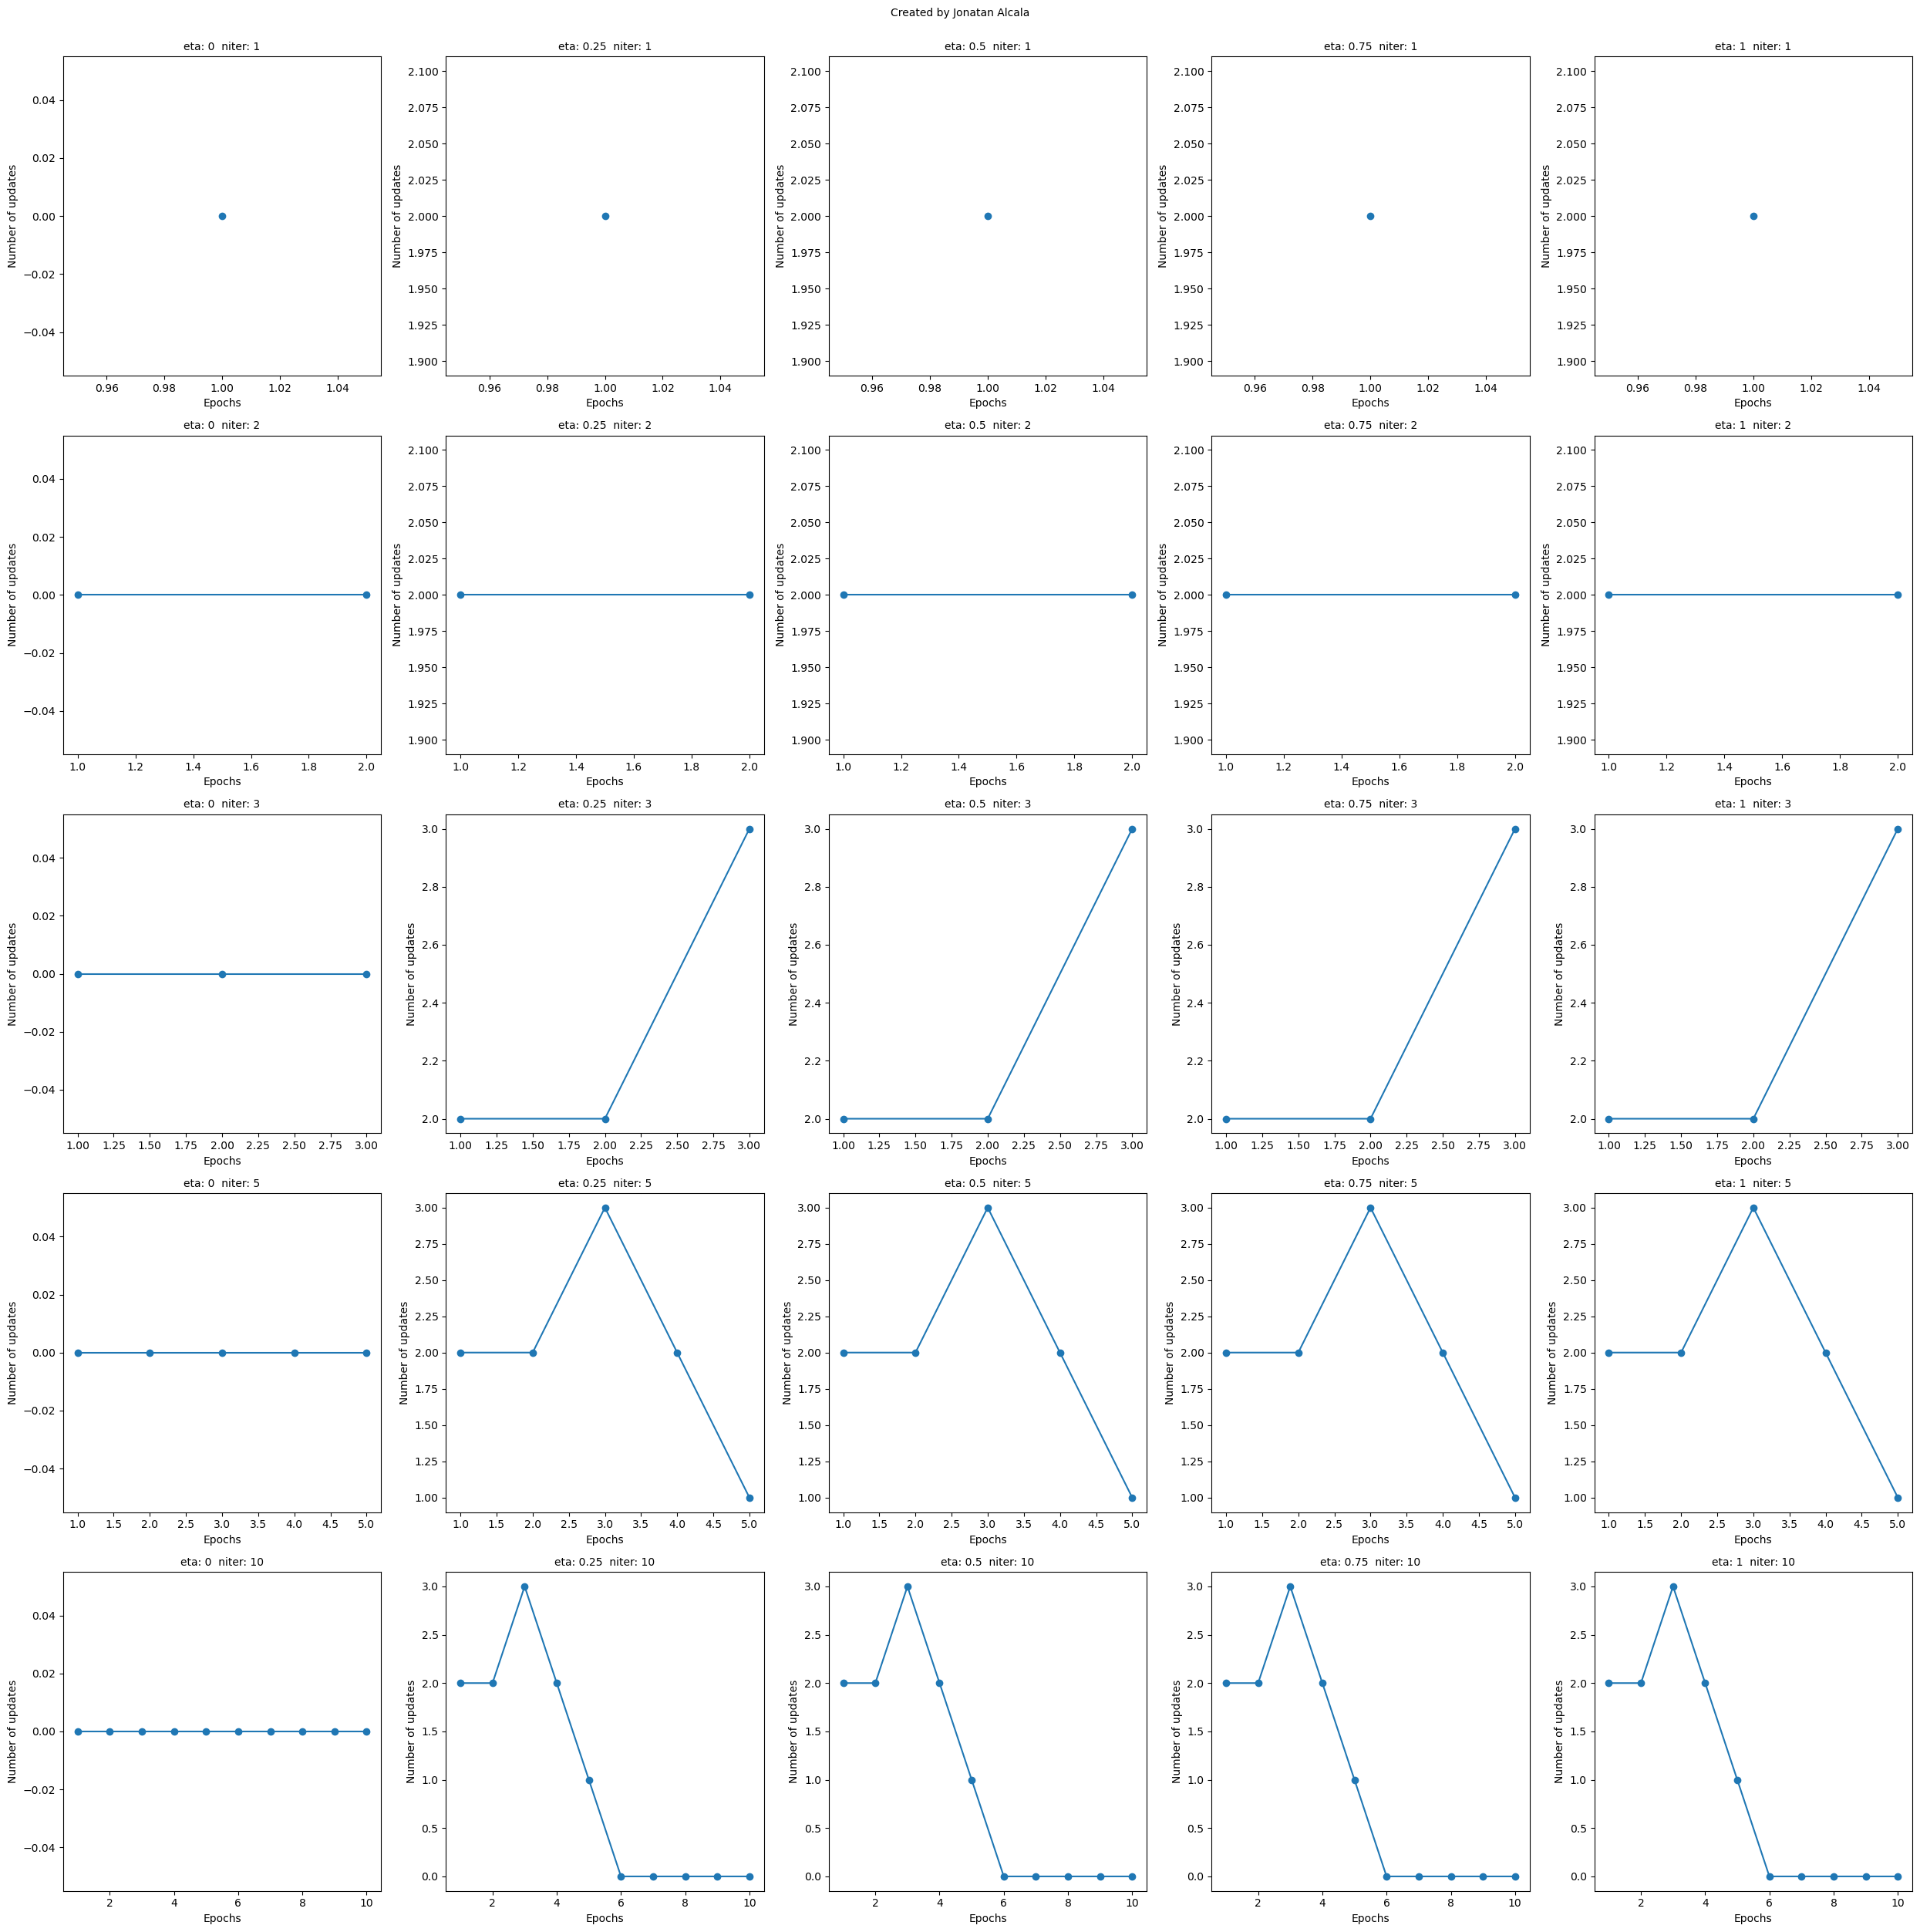

In [41]:
# Train Perceptron and find good value of eta and n_iter
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(25, 25))

list_eta = [0, 0.25, 0.5, 0.75, 1]
list_niter = [1, 2, 3, 5, 10]

fig.suptitle("Created by Jonatan Alcala", fontsize=10, y=1)

for j, n_temp in enumerate(list_niter):

    for i, e_temp in enumerate(list_eta):
        ppn = Perceptron(n_iter=n_temp, eta= e_temp).fit(X, y)
        ax[j, i].plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
        ax[j, i].set_xlabel('Epochs', fontsize=10)
        ax[j, i].set_ylabel('Number of updates', fontsize=10)
        ax[j, i].set_title(f"eta: {e_temp}  niter: {n_temp}", fontsize=10)
    
plt.tight_layout()
plt.show()